In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
filename = '/content/drive/MyDrive/Coding Dojo Data Science/PandasForDataManipulation/clean_sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Unnamed: 0,Product ID,Weight,Low Fat or Regular,Visibility,Product Category,Product List Price,Store ID,Year Opened,Area of Store,Grocery Store or Supermarket,Item_Outlet_Sales,Size of Store 2,Size of Store
0,0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380,2.0,Medium
1,1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228,2.0,Medium
2,2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700,2.0,Medium
3,3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800,2.0,Medium
4,4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052,1.0,High


In [34]:
df.shape

(8523, 14)

In [35]:
df.rename(columns={'Unnamed: 0':'Index'}, inplace=True)

I had to rename the first colume. Something that I missed in the last Part 3 of Project 1

In [36]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Index                         8523 non-null   int64  
 1   Product ID                    8523 non-null   object 
 2   Weight                        8523 non-null   float64
 3   Low Fat or Regular            8523 non-null   object 
 4   Visibility                    8523 non-null   float64
 5   Product Category              8523 non-null   object 
 6   Product List Price            8523 non-null   float64
 7   Store ID                      8523 non-null   object 
 8   Year Opened                   8523 non-null   int64  
 9   Area of Store                 8523 non-null   object 
 10  Grocery Store or Supermarket  8523 non-null   object 
 11  Item_Outlet_Sales             8523 non-null   float64
 12  Size of Store 2               8523 non-null   float64
 13  Siz

In [37]:
df.describe()

,Index,Weight,Visibility,Product List Price,Year Opened,Item_Outlet_Sales,Size of Store 2
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,4261.000000,12.736176,0.066132,140.992782,1997.831867,2181.288914,2.170832
std,2460.522505,4.234540,0.051598,62.275067,8.371760,1706.499616,0.600327
min,0.000000,4.555000,0.000000,31.290000,1985.000000,33.290000,1.000000
25%,2130.500000,9.310000,0.026989,93.826500,1987.000000,834.247400,2.000000
50%,4261.000000,12.150000,0.053931,143.012800,1999.000000,1794.331000,2.000000
75%,6391.500000,16.000000,0.094585,185.643700,2004.000000,3101.296400,3.000000
max,8522.000000,21.350000,0.328391,266.888400,2009.000000,13086.964800,3.000000


The distributions of 'Weight'

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


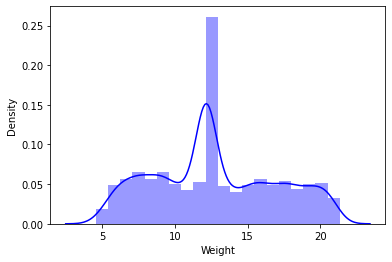

In [38]:
sns.distplot(df['Weight'], bins =20, color = 'blue');

The distributions of 'Visibility'

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


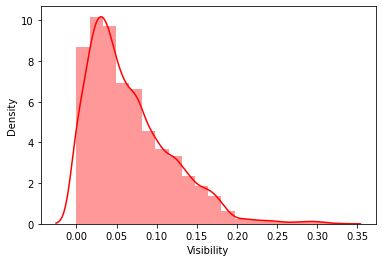

In [39]:
sns.distplot(df['Visibility'], bins =20, color = 'red');

The distributions of 'Item_Outlet_Sales'

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


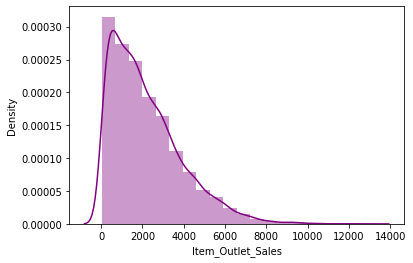

In [40]:
sns.distplot(df['Item_Outlet_Sales'], bins =20, color = 'purple');

The distributions of 'Product List Price'

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


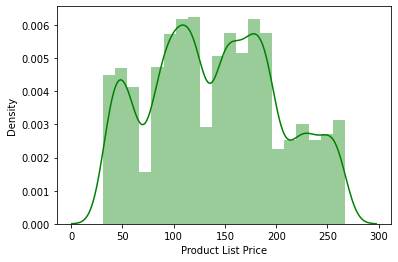

In [41]:
sns.distplot(df['Product List Price'], bins =20, color = 'green');

From the above histograms, "Visibilty" and "Item Outlet Sales" have a normal distribution, while "Weight" and "Product List Price" do not.

In [42]:
corr=df.corr()

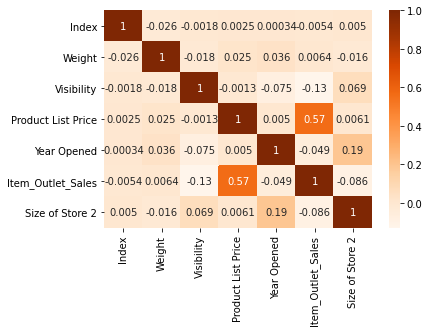

In [43]:
sns.heatmap(corr, cmap = "Oranges", annot=True);

There is a moderate correlation between "Item_Outlet_Sales" and "Product List Price"


Cleaning up "Low Fat or Regular" column variables

In [44]:
df['Low Fat or Regular'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Low Fat or Regular, dtype: int64

In [45]:
df['Low Fat or Regular'] = np.where((df['Low Fat or Regular'] =='LF'),"Low Fat",df['Low Fat or Regular'] )
df['Low Fat or Regular'] = np.where((df['Low Fat or Regular'] =='low fat'), "Low Fat",df['Low Fat or Regular'] )
df['Low Fat or Regular'] = np.where((df['Low Fat or Regular'] =='reg'), "Regular",df['Low Fat or Regular'] )


In [46]:
df['Low Fat or Regular'].value_counts()

Low Fat    5517
Regular    3006
Name: Low Fat or Regular, dtype: int64

Looking at the price of the top 2 'Product Category' as they relate to 'Low Fat or Regular'

In [47]:
df['Product Category'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Product Category, dtype: int64

In [48]:
Product_Category=['Fruits and Vegetables','Snack Foods']
filt = df['Product Category'].isin(Product_Category)
filt=df.loc[filt]

In [49]:
filt['Product Category'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Name: Product Category, dtype: int64

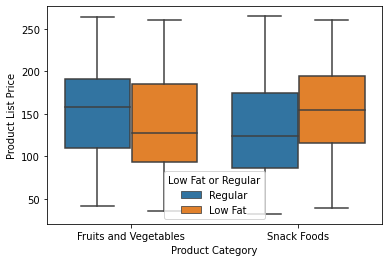

In [50]:
sns.boxplot(x="Product Category", y = "Product List Price", data=filt, hue='Low Fat or Regular');

Low fat snacks are more expensive than regular snacks. 